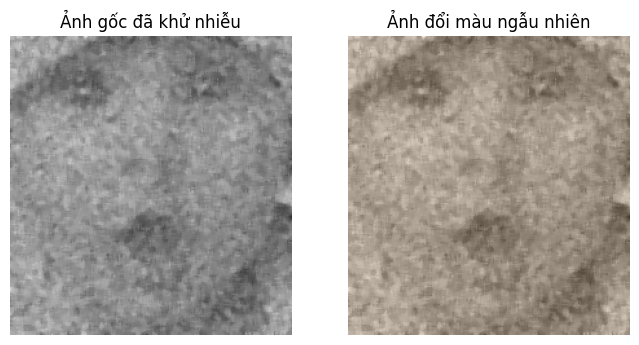

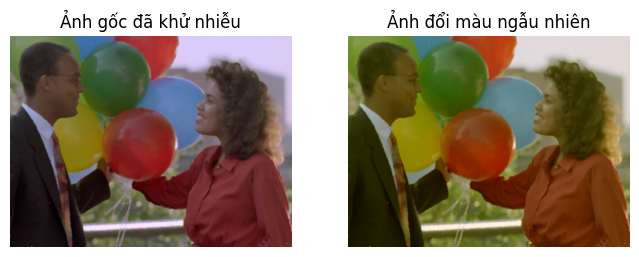

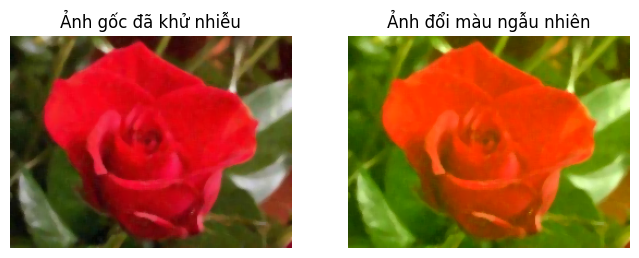

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import random

# Lấy danh sách các file ảnh trong thư mục hiện tại
image_files = glob.glob("baby.jpeg") + glob.glob("balloons_noisy.png") + glob.glob("flower.jpeg")

for file in image_files:
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Khử nhiễu bằng median filter
    img_denoised = cv2.medianBlur(img, 5)
    
    # Tạo giá trị ngẫu nhiên cho từng kênh màu
    r_shift = random.randint(-50, 50)
    g_shift = random.randint(-50, 50)
    b_shift = random.randint(-50, 50)
    
    # Đổi màu từng kênh, đảm bảo giá trị nằm trong [0,255]
    img_random = img_denoised.astype(np.int16)
    img_random[..., 0] = np.clip(img_random[..., 0] + r_shift, 0, 255)
    img_random[..., 1] = np.clip(img_random[..., 1] + g_shift, 0, 255)
    img_random[..., 2] = np.clip(img_random[..., 2] + b_shift, 0, 255)
    img_random = img_random.astype(np.uint8)
    
    # Hiển thị ảnh gốc và ảnh đã đổi màu
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    plt.title("Ảnh gốc đã khử nhiễu")
    plt.imshow(img_denoised)
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.title("Ảnh đổi màu ngẫu nhiên")
    plt.imshow(img_random)
    plt.axis('off')
    plt.show()

